# DDS_Structure de dictionnaire 

<u>Source</u> : G.Lassus, lycée Mauriac, Bordeaux

## <u>I/ Notion de tableau associatif</u>
Un **tableau associatif** est un type abstrait de données (au même titre que les listes, piles, files, vues précédemment). Ce type abstrait de données a la particularité de ne pas être totalement linéaire (ou «plat») puisqu'il associe des **valeurs** à des **clés**.  

Il est habituellement muni des opérations suivantes :
- ajout d'une nouvelle valeur associée à une nouvelle clé (on parlera de nouveau couple clé-valeur)
- modification d'une valeur associée à une clé existante
- suppression d'un couple clé-valeur
- récupération de la valeur associée à une clé donnée.

Un répertoire téléphonique est un exemple de tableau associatif :
- les clés sont les noms
- les valeurs sont les numéros de téléphone

En Python, il existe nativement une structure de tableau associatif : le **dictionnaire**.

## <u>II/  Dictionnaire et temps d'accès aux données</u>

La manipulation des dictionnaires a été vue en classe de Première. Les notions abordées sont rappelées à la fin de ce cours.  

Rappelons pour l'instant qu'un dictionnaire est de la forme :

In [ ]:
contacts = {"Antoine":"0648653125", "Kylian":"0712369503", "Paul":"0613784596"}

et qu'on accède aux valeurs par la syntaxe :

In [ ]:
contacts["Kylian"] 

Intéressons-nous à la problématique du temps d'accès aux données, par une petite expérience permise par le module ```timeit``` de Python.

### 1/ Préparation des mesures

Considérons deux fonctions ```fabrique_liste()``` et ```fabrique_dict()``` capables de fabriquer respectivement des listes et des dictionnaires de taille donnée en paramètre.

In [ ]:
def fabrique_liste(nb):
    lst = [k**2 for k in range(nb)]
    return lst

def fabrique_dict(nb):
    dct = {}
    for k in fabrique_liste(nb):
        dct[k] = 42
    return dct

In [ ]:
lst = fabrique_liste(10)
dct = fabrique_dict(10)

In [ ]:
lst

In [ ]:
dct

Le contenu de ces listes ou dictionnaires n'a pas grand intérêt. Dans nos mesures, on y cherchera une valeur qui n'y figure pas : la chaîne de caractères ```"a"```. On dit qu'on se place dans *le pire des cas*.

### <u>2/ Mesures des temps de recherche</u>


#### a) Temps de recherche pour les listes


- avec 10 valeurs :

In [ ]:
lst = fabrique_liste(10)

In [ ]:
%timeit "a" in lst

Nous sommes donc à l'ordre de grandeur $100 \times 10^{-9}$, soit $10^{-7}$ secondes.

- avec 100 valeurs :

In [ ]:
lst = fabrique_liste(100)

In [ ]:
%timeit "a" in lst

Nous sommes donc à l'ordre de grandeur $1 \times 10^{-6}$, soit $10^{-6}$ secondes.

- avec 1000 valeurs :

In [ ]:
lst = fabrique_liste(1000)

In [ ]:
%timeit "a" in lst

Nous sommes donc à l'ordre de grandeur $10 \times 10^{-6}$, soit $10^{-5}$ secondes.

**Conclusion** : le temps de recherche d'une valeur dans une **liste** est directement **proportionnel** à la longueur de cette liste. On dit qu'il est linéaire, ou bien qu'il est en $O(n)$.

#### b) Temps de recherche pour les dictionnaires
On va rechercher si ```"a"``` est une clé valide pour notre dictionnaire.

- avec 10 valeurs :

In [ ]:
dct = fabrique_dict(10)

In [ ]:
%timeit "a" in dct

Nous sommes donc à l'ordre de grandeur $10 \times 10^{-9}$, soit $10^{-8}$ secondes.

- avec 100 valeurs :

In [ ]:
dct = fabrique_dict(100)

In [ ]:
%timeit "a" in dct

Nous sommes donc toujours à l'ordre de grandeur $10 \times 10^{-9}$, soit $10^{-8}$ secondes.

- avec 10000 valeurs :

In [ ]:
dct = fabrique_dict(10000)

In [ ]:
%timeit "a" in dct

On retrouve avec 10000 valeurs pratiquement le même temps de recherche qu'avec 10 valeurs.

On remarque donc que le temps moyen est remarquablement **constant**. Il ne dépend pas du nombre d'éléments du dictionnaire dans lequel on cherche. On dit qu'il est en $O(1)$.

>Il y a donc une différence fondamentale à connaître entre les temps de recherche d'un éléments à l'intérieur :
- d'une **liste** : temps **proportionnel** à la taille de la liste.
- d'un **dictionnaire** : temps **constant**, indépendant de la taille de la liste.

### 3/ Fonctions de hachage  *(hors-programme)*
Tout ce qui suit est hors-programme de Terminale, mais permet de comprendre comment Python arrive à faire de la recherche en temps constant quelle que soit la taille du dictionnaire.

Il est important de se rappeler qu'un dictionnaire n'est pas **ordonné** au sens d'une liste triée (contrairement à l'objet «dictionnaire» de la vie courante, où chaque mot est classé suivant l'ordre alphabétique). 

On n'accède pas à une valeur suivant sa position, mais suivant sa clé.

Dans une liste, lorsqu'on veut savoir si un élément appartient à une liste (problème de la *recherche d'élément*), il n'y a pas (dans le cas général) de meilleure méthode que le parcours exhaustif de tous les éléments de la liste jusqu'à (éventuellement) trouver la valeur cherchée.

Dans un dictionnaire, on pourrait s'imaginer qu'il va falloir parcourir toutes les clés et regarder les valeurs correspondantes. Il n'en est rien.  
Pour comprendre cela nous allons faire un petit détour par les **fonctions de hachage.**


**Les fonctions de hachage** 

Lorsque vous téléchargez un fichier important et que vous souhaitez vérifier qu'il n'a pas été corrompu lors du téléchargement (ou avant), vous avez parfois la possibilité de vérifier l'intégrité de votre fichier téléchargé, en calculant une «empreinte» de votre fichier et en la comparant avec celle que vous êtes censée obtenir :

Voilà par exemple ce qui apparaît sur la page de téléchargement d'une iso d'ubuntu 18.04 :
![](data/iso.png)

La clé MD5 proposée pour chaque fichier est le résultat ce que **doit** donner le fichier (ici une iso d'environ 1,9 Go) lorsqu'il est «haché» par la fonction MD5. Dans notre cas, si nous téléchargeons 
```ubuntu-18.04.3-desktop-amd64.iso```, nous devons calculer l'empreinte du fichier téléchargé et vérifier que nous obtenons bien ```72491db7ef6f3cd4b085b9fe1f232345``` :


Essayons :

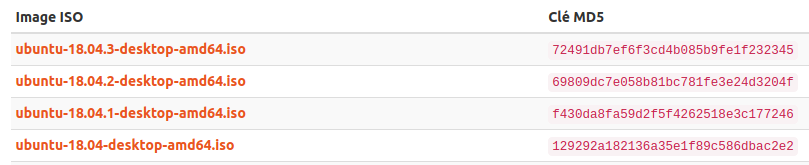

La clé calculée sur l'ordinateur correspond bien à celle indiquée sur le site de téléchargement : le fichier est intègre.


**Que fait la fonction de hachage MD5 ?**

Quelle que soit la taille du fichier donné en entrée, la fonction MD5 va le réduire à un mot de 128 bits.
Ce mot binaire de 128 bits est représenté par une chaîne de 32 caractères (en hexadécimal, de 0 à f). Il y a donc $2^{128}$ (de l'ordre de $10^{39}$) empreintes MD5 différentes, ce qui rend quasiment impossible le fait d'avoir un mauvais fichier qui donnerait (par un très très mauvais hasard) la bonne empreinte.

Le mécanisme effectif de calcul de la fonction MD5 est très complexe : une explication en est donnée [ici](http://www.bibmath.net/crypto/index.php?action=affiche&quoi=moderne/md5).


Il est évidemment **impossible** de revenir en arrière et de recréer le fichier original à partir de l'empreinte MD5. Dans le cas contraire, cela voudrait dire qu'on est capable de compresser *sans perte* un fichier de 1,9 Go en une chaîne de 128 bits. Cette impossibilité de trouver une fonction réciproque à la fonction de hachage est très importante en cryptographie.

En effet, les simples chaînes de caractères peuvent aussi être transformées par une fonction de hachage :
![](data/terminal.png)


![](data/md5.png)

Quel est l'intérêt de hacher une chaîne de caractère ? La conservation des mots de passe !


**Stockage des mots de passe sur un serveur**

Les sites qui nécessitent une authentification par login / mot de passe ne conservent pas en clair les mots de passe sur leur serveur. La moindre compromission de leur serveur serait en effet dramatique. Ce qui est conservé est l'empreinte du mot de passe après son passage par une fonction de hachage.  
Par exemple, un site où notre mot de passe serait ```vive la NSI``` conserverait dans ses bases de données l'empreinte ```e74fb2f94c052bbf16cea4a795145e35```.  
À chaque saisie du mot de passe côté client, l'empreinte est recalculée (toujours côté client, afin de ne pas faire transiter le mot de passe en clair), puis comparée au niveau du serveur avec l'empreinte stockée. 
De cette façon, si les communications entre le client et le serveur sont interceptées, ou bien si le serveur est compromis, le non-réversibilité de la fonction de hachage assure que le mot de passe ne peut pas être retrouvé par les attaquants.

**Non-réversibilité de la fonction de hachage, vraiment ?** 

Prenons l'empreinte MD5 ```bdc87b9c894da5168059e00ebffb9077``` et allons fureter du côté de (par exemple) https://md5hashing.net/hash/md5 

Notre empreinte ne résiste pas bien longtemps...  
Re-essayons alors avec l'empreinte  ```e74fb2f94c052bbf16cea4a795145e35```.


Les empreintes des mots de passe les plus fréquents sont stockées dans des tables (qu'on appelle *rainbow tables* ou *tables arc-en-ciel*) qui rendent possibles le déchiffrage de ces empreintes.

Pour contrer cela, les cryptographes rajoutent des caractères avant hachage (le *sel*), et choisissent surtout des bonnes fonctions de hachage. MD5 et SHA-1 ne sont plus utilisées, on préfère maintenant SHA-256 (voir [ici](https://fr.wikipedia.org/wiki/Secure_Hash_Algorithm)).

### <u>4/ Retour aux dictionnaires</u>
En quoi les fonctions de hachage ont-elles un rôle à jouer dans l'implémentation d'un dictionnaire ?  

L'idée essentielle est que chaque clé est hachée pour donner une empreinte unique, qui est ensuite transformée en un indice de positionnement dans un tableau.

Le dictionnaire :

In [ ]:
d = {"pommes":3, "poires":0, "bananes":5}

serait donc par exemple implémenté dans un tableau comme celui-ci :

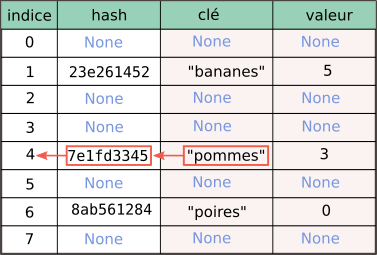

On peut remarquer que ce tableau laisse beaucoup de cases vides (pour plus de renseignements, voir [https://www.jessicayung.com/how-python-implements-dictionaries/](https://www.jessicayung.com/how-python-implements-dictionaries/) , site en anglais).


Si je souhaite ensuite accéder à l'élément ```d["kiwis"]``` :
- le hash de la chaîne ```"kiwis"``` est calculé. Par exemple, ```4512d2202```.
- l'indice de la position (éventuelle) de la clé ```"kiwis"``` dans mon dictionnaire est calculé à partir de ce hash ```4512d2202```. Dans notre exemple, cela pourrait donner l'indice 3.
- Python accède **directement** à cet indice du tableau :
    - si la valeur de la clé sur cette ligne du tableau est None, cela signifie que ```"kiwis"``` n'est pas une clé existante du tableau. C'est notre cas ici car il n'y a rien à la ligne 3.
    - si la valeur de la clé sur cette ligne du tableau est bien ```"kiwis"```, la valeur correspondante est renvoyée.

En résumé, Python sait toujours où aller chercher un élément de son dictionnaire : soit il le trouve à l'endroit calculé, soit il n'y a rien à cet endroit calculé, ce qui veut dire que l'élément ne fait pas partie du dictionnaire. 

Par ce mécanisme, l'accès à un élément du dictionnaire se fait toujours en temps **constant**.

Il existe une manière de «voir» que Python utilise une fonction de hachage pour implémenter un dictionnaire :


In [ ]:
mondico = {}

# un nombre peut-il être une clé?
mondico[4] = "foo"

# une chaîne de caractères peut-elle être une clé ?
mondico["riri"] = "fifi"

# une liste peut-elle être une clé ?
mondico[[2,5]] = "loulou"

Le message d'erreur est explicite : le type ```list``` que nous avons voulu utiliser comme clé n'est pas hachable, car c'est un type d'objet pouvant être modifié a posteriori tout en gardant la même référence (on dit que c'est un objet **mutable**):

In [ ]:
# La fonction `id(obj)` renvoie l'identité unique d'un objet sous forme d'entier
a = [3, 6, 8]
print(id(a))
a.append(12)
print(id(a))

Ce changement de valeur tout en gardant la même référence détruirait le principe associant à une clé unique une position unique dans le tableau implémentant le dictionnaire.

Ce problème ne se pose pas si la variable désigne une chaîne de caractères, ou un nombre :

In [ ]:
a = 2020
print(id(a))
a += 1
print(id(a))


Un variable contenant un entier est donc un objet **immuable** (on <b>non mutable</b>) car si on modifie la valeur de l'entier, la référence de la variable changera aussi. Comme un dictionnaire a besoin d'avoir des clés dont les références soient définitives, seuls les objets **immuables** peuvent donc servir de clés dans les dictionnaires.

## I<u>II/ Manipulation des dictionnaires</u>

Lien ici vers le cours de Première, https://github.com/lmayer65/NSI_T/blob/main/Programme_NSI_1/Repr%C3%A9sentation_Num%C3%A9rique_Donn%C3%A9es/Types.Construits/RND.Types.Construits.pdf (à partir de la page 10)

In [ ]:
dressing = {"pantalons":3, "pulls":4, "tee-shirts":8}

In [ ]:
dressing["pulls"]

In [ ]:
vocabulaire = {"navigateur":"browser", "précédent":"back", "suivant":"forward"}

In [ ]:
vocabulaire["suivant"]

In [ ]:
AlanTuring = {"naissance":(23,6,1912),"décès":(12,6,1954),"lieu naissance":"Londres", "lieu décès":"Wilmslow"}

In [ ]:
AlanTuring["décès"]

### <u>1/ Définition d'un dictionnaire</u>
Un dictionnaire est une donnée composite qui **n'est pas ordonnée** (dans le sens d'un tri d'une liste par exemple).  
Il fonctionne par un système de `clé:valeur`.  
Les clés, comme les valeurs, peuvent être de types différents.
Un <b>dictionnaire est délimité par des accolades</b>. 

<u>Rappels</u> :
- crochets [ ] -> listes
- parenthèses ( ) -> tuples
- accolades { } -> dictionnaires


In [ ]:
vocabulaire

In [ ]:
type(vocabulaire)

Il est possible d'obtenir la liste des clés et des valeurs avec la méthode `keys()` et la méthode `values`.

In [ ]:
dressing.keys()

In [ ]:
for dress in dressing.keys() :
    print(dress,end=";")

In [ ]:
vocabulaire.values()

In [ ]:
for val in dressing.values() :
    print(val,end=";")

### <u>3/ Création d'un dictionnaire vide</u>
On crée un dictionnaire vide par l'instruction :

In [ ]:
monDico = dict()

In [ ]:
type(monDico)

ou plus simplement de cette manière :

In [ ]:
unAutreDico = {}

In [ ]:
type(unAutreDico)

### <u>4/ Ajout / Modification d'un élément dans un dictionnaire</u>
Pas besoin d'une méthode `append()`, il suffit de rajouter une paire `clé : valeur`

In [ ]:
dressing["chaussettes"] = 12

In [ ]:
dressing

On peut évidemment modifier un dictionnaire existant (ce n'est pas un tuple !)

In [ ]:
dressing["chaussettes"] = 11

In [ ]:
dressing

### <u>5/ Suppression d'une valeur</u>
On utilise l'instruction `del` (déjà rencontrée pour les listes)

In [ ]:
del dressing["chaussettes"]

In [ ]:
dressing

### <u>6/ Test d'appartenance à un dictionnaire</u>
Le mot `in` permet de tester l'appartenance d'une clé à un dictionnaire. Un booléen est renvoyé. A tester dans une instruction conditionnelle par exemple.

In [ ]:
"cravates" in dressing

In [ ]:
"pulls" in dressing

### <u>7/ Utilisation de `in` pour d'autres types construits (listes, tuples, chaines de caractères...)</u>

In [ ]:
voyelles = ("a", "e", "i", "o", "u", "y")

In [ ]:
"y" in voyelles

In [ ]:
"z" in voyelles

In [ ]:
mot = "vacances"
"k" in mot